# <center> Parcial 3
### <center> Manuel Francisco Martinez Motta
### <center> Manuela Isabella Nobile Russi

In [30]:
#librerias
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation

### Punto 7 -> Estabilidad de la ecuación de Onda

Sabemos que la ecuación de onda unidimensional en su forma general es:

<center> $ \frac{\partial^2 u}{\partial t^2} = \alpha^2 \frac{\partial^2 u}{\partial x^2}, $

Y la relación de recurrencia para el análisis de diferencias finitas es:

<center> $ u^{l + 1}_{i} = \lambda^{2}(u^{l}_{i + 1} - 2u^{l}_{i} + u^{l}_{i - 1}) + 2u^{l}_{i} - u^{l - 1}_{i}, $ Donde $ \lambda = \frac{\alpha \Delta t}{\Delta x} $

Sabemos además que para un análisis numérico computacional, la relación de recurrencia se puede dividir en la solución teórica computacional y el error asociado a dicho calculo, de la forma $u^{l}_{i} = f^{l}_{i} + \varepsilon^{l}_{i} $

De esta forma, podemos estudiar solo el error asociado de la forma:

<center> $\varepsilon^{l + 1}_{i} = \lambda^{2}(\varepsilon^{l}_{i + 1} - 2\varepsilon^{l}_{i} + \varepsilon^{l}_{i - 1}) + 2\varepsilon^{l}_{i} - \varepsilon^{l - 1}_{i}$

Si entonces, estudiamos este error como una función que varía de la forma $\varepsilon^{l}_{i} = \gamma^{l}e^{jk(i\cdot\Delta{x})}$, con $\gamma = e^{-\omega\Delta{t}}$, es decir, desde su forma compleja podemos notar que tenemos entonces

<center> $\gamma^{l + 1}e^{jk(i\cdot\Delta{x})} = \alpha^{2}(\gamma^{l}e^{jk((i + 1)\cdot\Delta{x})} - 2\gamma^{l}e^{jk(i\cdot\Delta{x})} + \gamma^{l}e^{jk((i - 1)\cdot\Delta{x})}) + 2\gamma^{l}e^{jk(i\cdot\Delta{x})} - \gamma^{l - 1}e^{jk(i\cdot\Delta{x})}$

Y reescribiendo queda que 

<center> $ \gamma \cdot \gamma^{l}e^{jk(i\cdot\Delta{x})} = \lambda^{2}(e^{jk\cdot\Delta{x}} - 2 + e^{-jk\cdot\Delta{x}}) \cdot \gamma^{l}e^{jk(i\cdot\Delta{x})} + 2\cdot\gamma^{l}e^{jk(i\cdot\Delta{x})} - \gamma^{-1}\gamma^{l}e^{jk(i\cdot\Delta{x})}$

Sabiendo que $\sin(x) = \frac{e^{ix} - e^{-ix}}{2i}$ y dividiendo todo por $\gamma^{l}e^{jk(i\cdot\Delta{x})}$ entonces la función nos queda de la forma

<center> $\gamma = -4\lambda^{2}\sin^{2}\left(\frac{k\Delta{x}}{2}\right) + 2 - \gamma^{-1}$

Y como definimos $\gamma$ como la magnitud del error tenemos que esta ecuación satisface que

<center> $\gamma^{2} + \left[4\lambda^{2}\sin^{2}\left(\frac{k\Delta{x}}{2}\right) - 2\right]\gamma + 1 > 0$

Que es una ecuación cuadrática, del cual necesito que tenga como solución raices complejas para que se satisfaga que la solución es estable y esto solo se obtiene si $\sqrt(b ^2 - 4ac) < 0$, entonces

<center> $\left[4\lambda^{2}\sin^{2}\left(\frac{k\Delta{x}}{2}\right) - 2\right]^{2} - 4 < 0 $

<center> $4\lambda^{2}\sin^{2}\left(\frac{k\Delta{x}}{2}\right) - 2 < 2$

<center> $\lambda^{2}\sin^{2}\left(\frac{k\Delta{x}}{2}\right) < 1$

Como sabemos que $sin(x)|_{max} = 1$, tenemos entonces que 

<center> $\lambda^{2} < 1$ o que

<center> $|\lambda| < 1$


### Punto 8 -> Modelo FitzHugh-Nagumo

Perdon :(

### Punto 10 -> Ecuacion de Burguers 2D

In [31]:
#Parámetros
nu = 0.3
T = 10
Nx = Ny = 60
Nt = 500
Lx = Ly = 10
dx = Lx / Nx
dy = Ly / Ny
dt = T / Nt

In [32]:
# Condición inicial
x = np.linspace(-5, 5, Nx)
y = np.linspace(-5, 5, Ny)
X, Y = np.meshgrid(x, y)
u0 = 5 * np.exp(-(X**2 + Y**2))

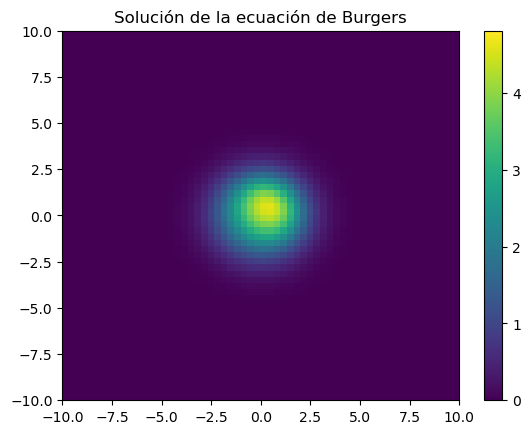

In [33]:
fig, ax = plt.subplots()
plot = ax.imshow(u, cmap='viridis', extent=(-Lx, Lx, -Ly, Ly), origin='lower', aspect='auto')
plt.colorbar(plot)
ax.set_title('Solución de la ecuación de Burgers')

def update(frame):
    global u
    un = u.copy()
    for i in range(1, Nx - 1):
        for j in range(1, Ny - 1):
            u[i, j] = un[i, j] - un[i, j] * (dt / dx) * (un[i, j] - un[i-1, j]) \
                      - un[i, j] * (dt / dy) * (un[i, j] - un[i, j-1]) \
                      + nu * (dt / dx**2) * (un[i+1, j] - 2*un[i, j] + un[i-1, j]) \
                      + nu * (dt / dy**2) * (un[i, j+1] - 2*un[i, j] + un[i, j-1])
    # Condiciones de frontera
    u[0, :] = 0
    u[-1, :] = 0
    u[:, 0] = 0
    u[:, -1] = 0
    plot.set_array(u)
    return plot,

# Creación de la animación
ani = animation.FuncAnimation(fig, update, frames=Nt, interval=50, blit=True)
plt.show()

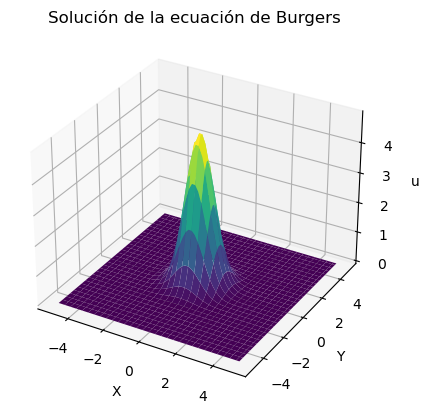

In [34]:
# Esquema de diferencias finitas explícito
u = np.copy(u0)
frames = []
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('u')
ax.set_title('Solución de la ecuación de Burgers')

def update_plot(frame, u, plot):
    ax.clear()
    u_old = np.copy(u)
    for i in range(1, Nx-1):
        for j in range(1, Ny-1):
            u[i, j] = u_old[i, j] - dt * (u_old[i, j] * (u_old[i, j] - u_old[i-1, j]) / dx +
                                          u_old[i, j] * (u_old[i, j] - u_old[i, j-1]) / dy) + \
                                          nu * dt * ((u_old[i+1, j] - 2*u_old[i, j] + u_old[i-1, j]) / dx**2 +
                                                     (u_old[i, j+1] - 2*u_old[i, j] + u_old[i, j-1]) / dy**2)
    # Condiciones de frontera
    u[0, :] = 0
    u[-1, :] = 0
    u[:, 0] = 0
    u[:, -1] = 0

    plot = ax.plot_surface(X, Y, u, cmap='viridis')
    return plot,

plot = ax.plot_surface(X, Y, u, cmap='viridis')
ani = animation.FuncAnimation(fig, update_plot, frames=Nt, fargs=(u, plot), interval=50, blit=False)
plt.show()